In [58]:
import os

# Get the current working directory
current_directory = os.getcwd()

print(f"Current working directory: {current_directory}")


Current working directory: C:\Users\dilee\oil aug


In [60]:
files = os.listdir()
print("Files in directory:", files)

Files in directory: ['.ipynb_checkpoints', '1.png', '10.png', '11.png', '12.png', '13.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', 'oil finished.ipynb', 'TargetLoc']


In [62]:
# List all files with .png extension
png_files = [f for f in os.listdir() if f.endswith('.png')]
print("PNG files:", png_files)

PNG files: ['1.png', '10.png', '11.png', '12.png', '13.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


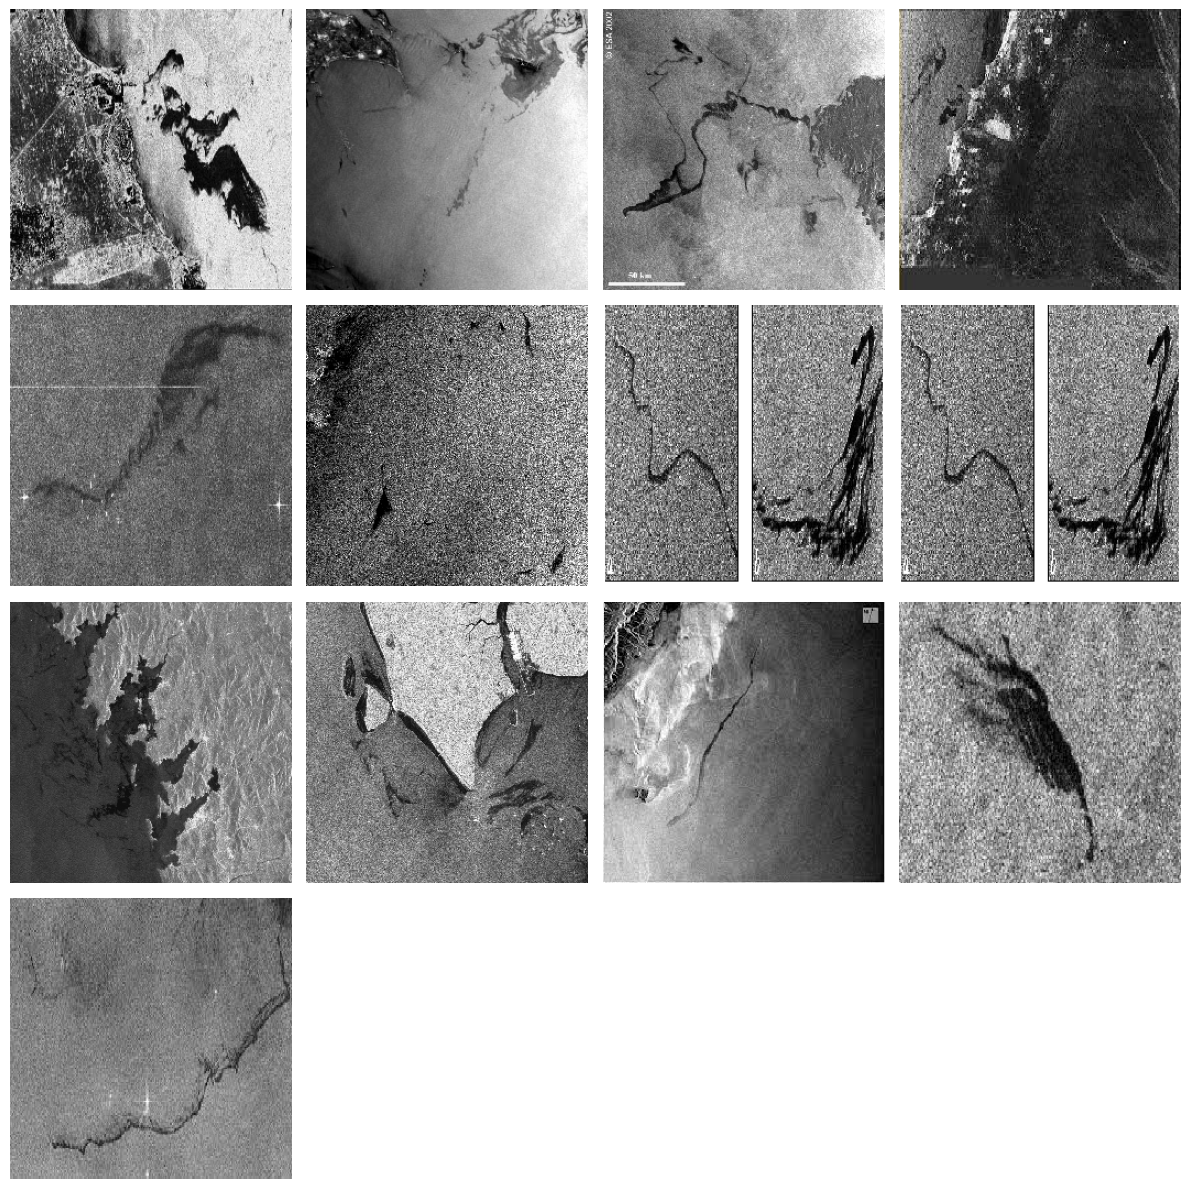

In [64]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Specify the path to your folder containing the images
folder_path = "C:\\Users\\dilee\\OneDrive\\Documents\\SIH PROJECT\\OIL SPILL TRAIL DATASET\\OIL SPILL TRAIL DATASET"

# Desired image dimensions (e.g., 256x256 pixels)
img_width, img_height = 256, 256

# Create an empty list to store image arrays
image_list = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Add other extensions if needed
        # Load the image and resize it to the fixed dimensions
        img = load_img(os.path.join(folder_path, filename), target_size=(img_width, img_height))  # Resize the image
        img_array = img_to_array(img)  # Convert image to numpy array
        image_list.append(img_array)  # Add to the list

# Convert list to a numpy array for further use (optional)
image_array = np.array(image_list)

# Plot the images using Matplotlib
num_images = len(image_list)
cols = 4  # Number of columns for the grid display
rows = num_images // cols + (num_images % cols > 0)  # Calculate the number of rows

plt.figure(figsize=(12, 12))

for i, img_array in enumerate(image_list):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_array.astype('uint8'))
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()


In [66]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Specify the path to your folder containing the images
folder_path = "C:\\Users\\dilee\\OneDrive\\Documents\\SIH PROJECT\\OIL SPILL TRAIL DATASET\\OIL SPILL TRAIL DATASET"

# Create an empty list to store image arrays
image_list = []

# Iterate through all .png files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Only process .png files
        # Load the image
        img = load_img(os.path.join(folder_path, filename))  # Load each image
        img_array = img_to_array(img)  # Convert image to numpy array
        img_array = img_array.reshape((1,) + img_array.shape)  # Reshape to (1, height, width, channels)
        image_list.append(img_array)  # Add the reshaped array to the list

# Print out the number of images loaded
print(f"Loaded {len(image_list)} PNG images.")


Loaded 13 PNG images.


In [68]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

# Specify the path to your folder containing the images
folder_path = "./"
save_directory = 'TargetLoc'  # Directory where the augmented images will be saved

# Create an empty list to store image arrays
image_list = []

# Desired image dimensions (e.g., 256x256 pixels)
img_width, img_height = 256, 256

# ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,      # Random rotation between 0 and 40 degrees
    width_shift_range=0.2,  # Horizontal shift by 20% of the width
    height_shift_range=0.2, # Vertical shift by 20% of the height
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Zoom-in, zoom-out
    horizontal_flip=True,   # Horizontal flip
    fill_mode='nearest'     # Fill missing pixels after augmentation
)

# Iterate through all .png files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Only process .png files
        # Load the image and resize it to the fixed dimensions
        img = load_img(os.path.join(folder_path, filename), target_size=(img_height, img_width))  # Resize the image
        img_array = img_to_array(img)  # Convert image to numpy array
        img_array = img_array.reshape((1,) + img_array.shape)  # Reshape to (1, height, width, channels)
        
        # Append the reshaped image to the list
        image_list.append(img_array)

# Set the batch size
batch_size = 1
max_images_per_image = 50  # Number of augmented images per original image

# Ensure the save directory exists
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Iterate through each image in the dataset and apply augmentation
for idx, img_array in enumerate(image_list):
    count = 0
    # Generate augmented images and save them in the target directory
    for batch in datagen.flow(img_array, batch_size=batch_size, save_to_dir=save_directory,
                              save_prefix=f'Img_{idx}', save_format='png'):  # Save as .png
        count += 1
        if count >= max_images_per_image:  # Stop after saving the desired number of augmented images per original image
            break
    print(f"Total images saved for image {idx}: {count * batch_size}")

print("Augmented images generated for all images in the dataset.")


Total images saved for image 0: 50
Total images saved for image 1: 50
Total images saved for image 2: 50
Total images saved for image 3: 50
Total images saved for image 4: 50
Total images saved for image 5: 50
Total images saved for image 6: 50
Total images saved for image 7: 50
Total images saved for image 8: 50
Total images saved for image 9: 50
Total images saved for image 10: 50
Total images saved for image 11: 50
Total images saved for image 12: 50
Augmented images generated for all images in the dataset.
